In [387]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

## Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.


# Data Cleaning

In [2]:
df= pd.read_csv('train_v9rqX0R.csv')
df1=pd.read_csv('test_AbJTz2l.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [6]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [7]:
from statistics import mode
mode=df[df['Outlet_Location_Type']=='Tier 2']['Outlet_Size'].mode()[0]
mode1=df[df['Outlet_Location_Type']=='Tier 3']['Outlet_Size'].mode()[0]
df.Outlet_Size=df.apply(lambda x:mode if x.Outlet_Location_Type=='Tier 2' and pd.isnull(x['Outlet_Size']) else(mode1 if
                                                                                           x.Outlet_Location_Type=='Tier 3' and pd.isnull(x['Outlet_Size']) else x.Outlet_Size),axis=1 )

In [8]:
df['Outlet_Size'].value_counts()

Small     4243
Medium    3348
High       932
Name: Outlet_Size, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
import numpy as np
from sklearn.impute import KNNImputer

In [11]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
a=imputer.fit_transform(pd.get_dummies(df[['Item_Weight','Outlet_Location_Type','Outlet_Type','Item_Fat_Content']]))[:,0]

In [12]:
df['Item_Weight']=a

In [13]:
df.info() #format are right

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':"Low Fat"},inplace=True) #check for outliers 
# and remove them

In [15]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

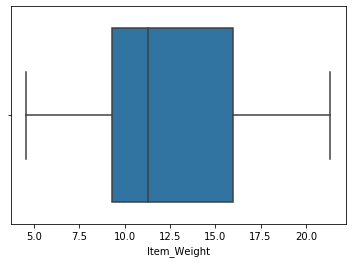

In [16]:
sns.boxplot(df['Item_Weight'])

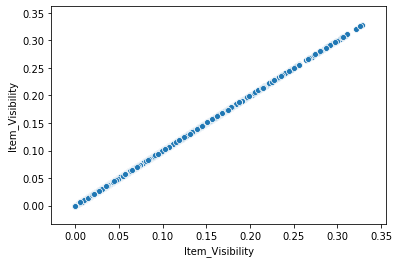

In [17]:
sns.scatterplot(x='Item_Visibility',y='Item_Visibility',data=df)

In [18]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

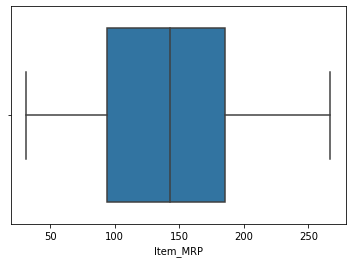

In [19]:
sns.boxplot(df['Item_MRP'])

In [20]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [21]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [22]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [23]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [24]:
# for test data
from statistics import mode
mode=df1[df1['Outlet_Location_Type']=='Tier 2']['Outlet_Size'].mode()[0]
mode1=df1[df1['Outlet_Location_Type']=='Tier 3']['Outlet_Size'].mode()[0]
df1.Outlet_Size=df1.apply(lambda x:mode if x.Outlet_Location_Type=='Tier 2' and pd.isnull(x['Outlet_Size']) else(mode1 if
                                                                                           x.Outlet_Location_Type=='Tier 3' and pd.isnull(x['Outlet_Size']) else x.Outlet_Size),axis=1 )
imputer = KNNImputer(n_neighbors=2, weights="uniform")
a=imputer.fit_transform(pd.get_dummies(df1[['Item_Weight','Outlet_Location_Type','Outlet_Type','Item_Fat_Content']]))[:,0]
df1['Item_Weight']=a
df1['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':"Low Fat"},inplace=True)

# Data Analysis


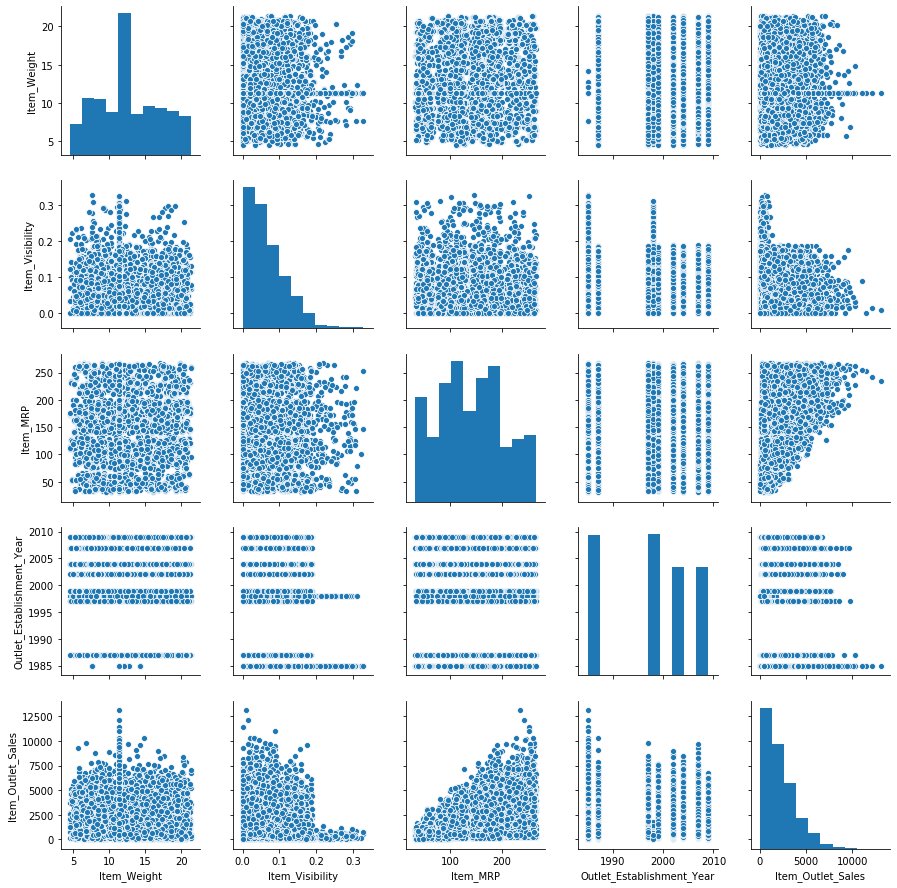

In [25]:
sns.pairplot(df)

1. Item visibility and item sales outlet is left skewed is left skewed, we can use standard scalar for normalization

2. as we can see in the plot they are not seperated by linear regression we can try decision tree, random forest or boosting technique to split the and predict data(using information gain or gini index) or SVR

3. We can see that low sales has comparatively low visibility

4. High MRP has comparatively low sales

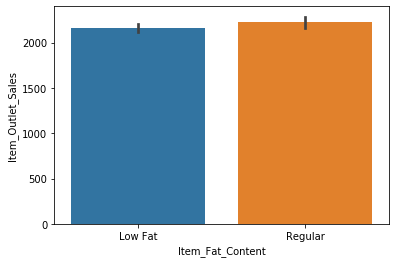

In [26]:
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)

Mean are almost the same for low fat and regular but regular has little more sales than lowfat

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

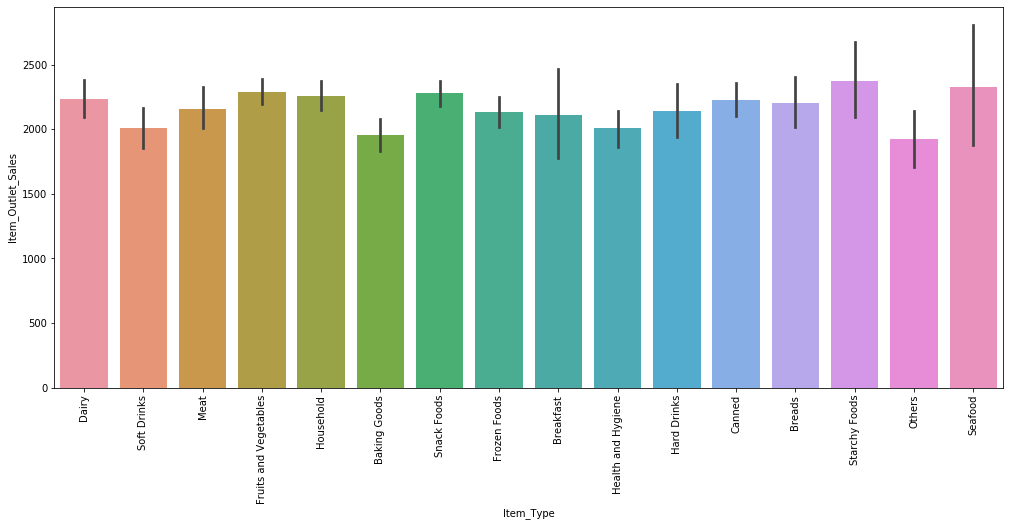

In [27]:
plt.figure(figsize=(17,7))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=df)
plt.xticks(rotation=90)

 soft drinks, baking goods, and health and hygene has comparatively low sales 

Means of different item type are varying we can use it in our prediction

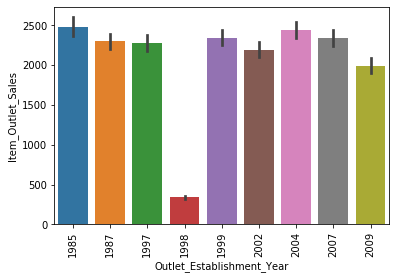

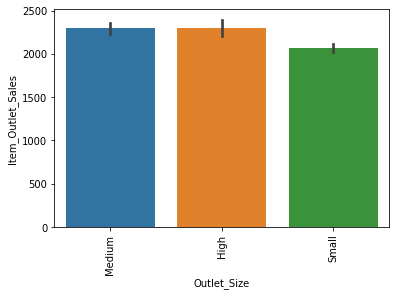

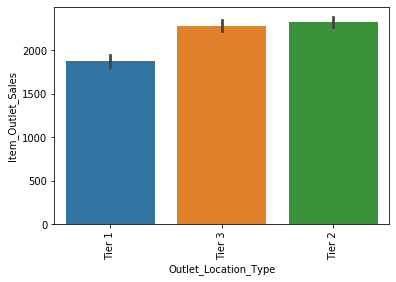

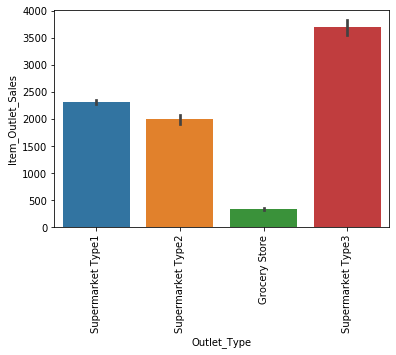

In [28]:
for i in df[['Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']].columns:
    chart = sns.barplot(x=df[i], y=df['Item_Outlet_Sales'])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type and Outlet_Type has a good varying values 
1. Grocery store has a really low sales
2. Teir has comparatively low sales 
3. 1998 we can see has low sales
4. small size has comparatively low sales

we can look into it as to why is they have low sales and try to increase their saless

In [29]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.025941,0.025578,0.086123,0.002656
Item_Visibility,-0.025941,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025578,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.086123,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.002656,-0.128625,0.567574,-0.049135,1.000000


There is high correlation between mrp and sales we can clearly say that high mrp has low sales

there is very less correlation between outlet year and weight

# Data preprocessing

In [26]:
df.iloc[:,1:-1].head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [27]:
X_train=pd.get_dummies(df.iloc[:,1:-1])
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [28]:
y_train=pd.get_dummies(df1.iloc[:,1:])
y_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,14.600,0.099575,241.7538,1998,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315,0.015388,155.0340,2007,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,15.325,0.118599,234.2300,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)
#X_test = sc.transform(X_test)

In [30]:
X_test=df.iloc[:,-1].values

In [31]:
import statsmodels.api as sm

X_sm  = sm.add_constant(X_train)
model = sm.OLS(X_test,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     392.0
Date:                Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:57:26   Log-Likelihood:                -71988.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8494   BIC:                         1.442e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2181.2889     12.229    178.373      0.000    2157.318    2205.260
x1            -3.4834     12.430     -0.280      0.779     -27.850      20.883
x2           -15.7236     12.832     -1.225      0.220     -40.878       9.431
x3           969.2924     12.310     78.741      0.000     945.162     993.423
x4           -34.7241      4.002     -8.677      0.000     -42.569     -26.879
x5            -9.6958      6.744     -1.438      0.151     -22.916       3.524
x6             9.6958      6.744      1.438      0.151      -3.524      22.916
x7             1.6049     11.366      0.141      0.888     -20.675      23.885
x8             1.8514     11.869      0.156      0.876     -21.416      25.119
x9             1.5479     12.101      0.128      0.898     -22.173      25.269
x10            8.3755     11.330      0.739      0.460     -13.833      30.584
x11           -9.3326     11.265     -0.828      0.407     -31.415      12.749
x12           -6.5609     11.069     -0.593      0.553     -28.259      15.137
x13           12.6927     10.666      1.190      0.234      -8.215      33.600
x14            0.8568     12.019      0.071      0.943     -22.703      24.417
x15           -1.0446     11.727     -0.089      0.929     -24.033      21.944
x16          -10.1826     11.388     -0.894      0.371     -32.506      12.141
x17            1.2475     11.702      0.107      0.915     -21.691      24.186
x18           -2.1154     12.059     -0.175      0.861     -25.754      21.523
x19           16.4878     12.133      1.359      0.174      -7.296      40.272
x20           -1.8051     10.635     -0.170      0.865     -22.653      19.042
x21           -4.8575     11.647     -0.417      0.677     -27.689      17.974
x22            3.6383     12.013      0.303      0.762     -19.910      27.186
x23         -231.8388      7.677    -30.199      0.000    -246.888    -216.790
x24           -7.2294      4.335     -1.668      0.095     -15.728       1.269
x25           34.2900      9.431      3.636      0.000      15.802      52.778
x26          -26.2623      4.616     -5.689      0.000     -35.311     -17.213
x27         -178.2658      7.126    -25.017      0.000    -192.234    -164.298
x28          227.7518      4.545     50.110      0.000     218.842     236.661
x29           42.8303      9.618      4.453      0.000      23.976      61.685
x30          -26.4158      9.634     -2.742      0.006     -45.300      -7.531
x31           41.2968      8.340      4.952      0.000      24.949      57.644
x32           34.5352      6.766      5.104      0.000      21.272      47.799
x33           -7.2294      4.335     -1.668      0.095     -15.728       1.269
x34           33.9112      3.919      8.652      0.000      26.228      41.594
x35          -28.6109      3.668     -7.801      0.000     -35.800     -21.422
x3

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, X_test)

np.mean(cross_val_score(lm,X_train,X_test, scoring = 'neg_mean_absolute_error', cv= 3))

-841.0207403301387

# Lasso regression

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13681254.131320953, tolerance: 1644177.272197441
  positive)
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14570358.25043106, tolerance: 1671983.8766903472
  positive)
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15299804.299945831, tolerance: 1647195.3892419788
  positive)


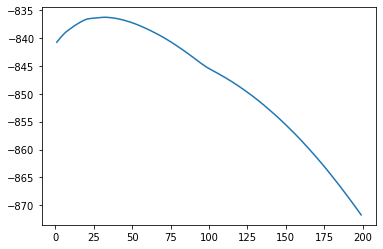

In [37]:
alpha = []
error = []

for i in range(1,200):
    alpha.append(i/1)
    lml = Lasso(alpha=(i/1))
    error.append(np.mean(cross_val_score(lml,X_train,X_test, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [38]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
31,32.0,-836.233571


In [39]:
lm_l = Lasso(alpha=32.0)
lm_l.fit(X_train,X_test)
np.mean(cross_val_score(lm_l,X_train,X_test, scoring = 'neg_mean_absolute_error', cv= 3))

-836.233570785325

# Decision tree, Random forest and boosting technique

In [40]:
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor(random_state = 0)
Regressor.fit(X_train, X_test)
np.mean(cross_val_score(Regressor,X_train,X_test, scoring = 'neg_mean_absolute_error', cv= 3))

-1069.4395509327703

In [369]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, max_features=0.9,
                           min_samples_leaf=18, min_samples_split=20, n_estimators=400,criterion='mse',max_depth=10.2,
                           max_samples=5665)
rf.fit(X_train, X_test)
np.mean(cross_val_score(rf,X_train,X_test,scoring = 'neg_mean_absolute_error', cv= 3))

-759.8179991737552

In [88]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, X_test)
np.mean(cross_val_score(model,X_train,X_test,scoring = 'neg_mean_absolute_error', cv= 3))

[14:31:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:31:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:31:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:31:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-760.0890445868414

In [44]:
from sklearn.ensemble import AdaBoostRegressor
classifier = AdaBoostRegressor(
    n_estimators=500
)
classifier.fit(X_train, X_test)
np.mean(cross_val_score(classifier,X_train,X_test,scoring = 'neg_mean_absolute_error', cv= 3))

-1026.413337543527

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,1.01]

for learning_rate in lr_list:
    gb_clf = GradientBoostingRegressor(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, X_test)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, X_test)))

Learning rate:  0.05
Accuracy score (training): 0.185
Learning rate:  0.075
Accuracy score (training): 0.252
Learning rate:  0.1
Accuracy score (training): 0.306
Learning rate:  0.25
Accuracy score (training): 0.487
Learning rate:  0.5
Accuracy score (training): 0.555
Learning rate:  0.75
Accuracy score (training): 0.565
Learning rate:  1
Accuracy score (training): 0.570
Learning rate:  1.01
Accuracy score (training): 0.571


In [46]:
gb_clf = GradientBoostingRegressor(n_estimators=200, learning_rate=1.01, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, X_test)
np.mean(cross_val_score(gb_clf,X_train,X_test,scoring = 'neg_mean_absolute_error', cv= 3))

-830.116256143236

In [38]:
import sklearn
extra1=sklearn.ensemble.ExtraTreesRegressor(bootstrap=True, max_features=0.8,
                    min_samples_leaf=18, min_samples_split=6, n_estimators=100)
extra1.fit(X_train,X_test)
np.mean(cross_val_score(extra1,X_train,X_test,scoring = 'neg_mean_absolute_error', cv= 3))

-755.7478931397764

## As the accuracy of ExtraTreesRegressor fit the best we will use ExtraTreesRegressor 

In [385]:
import sklearn
extra=sklearn.ensemble.ExtraTreesRegressor(bootstrap=True, max_features=0.9,
                    min_samples_leaf=18, min_samples_split=20, n_estimators=400,criterion='mse',max_depth=10.2,
                                           max_samples=5665)
extra.fit(X_train,X_test)
np.mean(cross_val_score(extra,X_train,X_test,scoring = 'neg_mean_absolute_error', cv= 3))

-753.9840726814722

In [386]:
#-756.0596882610718
#-755.66193353781
#-755.105940462904
e=extra.predict(y_train)
df1['Item_Outlet_Sales']=e
df1[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']].to_csv('samplesub2.csv',index=False)